In [1]:
import pandas as pd
import seaborn as sns
import matplotlib as plt
import numpy as np

train_df = pd.read_csv("/kaggle/input/spaceship-titanic/train.csv")
test_df = pd.read_csv("/kaggle/input/spaceship-titanic/test.csv")

In [2]:
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


Split Cabin into its three components

In [3]:
train_df[['Cabin_deck', 'Cabin_num', 'Cabin_side']] = train_df['Cabin'].str.split('/', expand= True)
test_df[['Cabin_deck', 'Cabin_num', 'Cabin_side']] = test_df['Cabin'].str.split('/', expand= True)

In [4]:
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Cabin_deck,Cabin_num,Cabin_side
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,0,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,0,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,0,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,1,S


In [5]:
# filling in nulls

# fill in spending columns with 0
spending_cols = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
train_df[spending_cols] = train_df[spending_cols].fillna(0)
test_df[spending_cols] = test_df[spending_cols].fillna(0)

# fill in age with median age
train_df['Age'] = train_df['Age'].fillna(train_df['Age'].median())
test_df['Age'] = test_df['Age'].fillna(test_df['Age'].median())


# fill in cat columns with mode
cat_cols = ['HomePlanet', 'Destination', 'Cabin_deck', 'Cabin_side']
for col in cat_cols:
    train_df[col] = train_df[col].fillna(train_df[col].mode()[0])
    test_df[col] = test_df[col].fillna(test_df[col].mode()[0])

# fill in boolean columns with mode
train_df['CryoSleep'] = train_df['CryoSleep'].fillna(train_df['CryoSleep'].mode()[0])
test_df['CryoSleep'] = test_df['CryoSleep'].fillna(test_df['CryoSleep'].mode()[0])
train_df['VIP'] = train_df['VIP'].fillna(train_df['VIP'].mode()[0])
test_df['VIP'] = test_df['VIP'].fillna(test_df['VIP'].mode()[0])

# # drop all other rows with missing values
# train_df = train_df.dropna()
# test_df = test_df.dropna()

# select only columns we need
train_df = train_df[['PassengerId', 'HomePlanet', 'CryoSleep', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 
         'Transported', 'Cabin_deck', 'Cabin_num', 'Cabin_side']]

test_df = test_df[['PassengerId', 'HomePlanet', 'CryoSleep', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Cabin_deck', 'Cabin_num', 'Cabin_side']]

/tmp/ipykernel_13/2983662238.py:20: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_df['CryoSleep'] = train_df['CryoSleep'].fillna(train_df['CryoSleep'].mode()[0])
/tmp/ipykernel_13/2983662238.py:21: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_df['CryoSleep'] = test_df['CryoSleep'].fillna(test_df['CryoSleep'].mode()[0])
/tmp/ipykernel_13/2983662238.py:22: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the fu

In [6]:
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Cabin_deck,Cabin_num,Cabin_side
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,0,P
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F,0,S
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A,0,S
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,A,0,S
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,F,1,S


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='FoodCourt', ylabel='Count'>

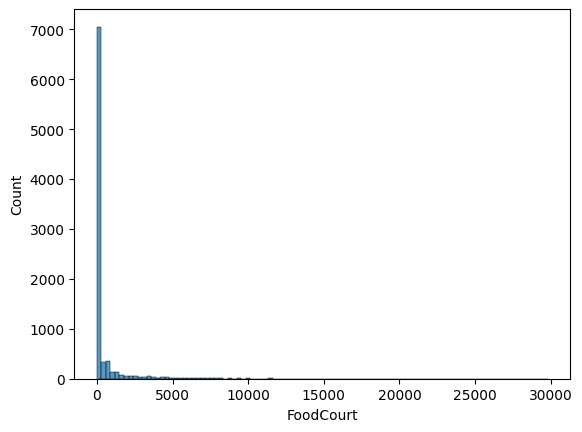

In [7]:
sns.histplot(
    train_df,
    x='FoodCourt',
    bins=100)

In [8]:
train_df['RoomService_log'] = np.log1p(train_df['RoomService'])
test_df['RoomService_log'] = np.log1p(test_df['RoomService'])

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='RoomService_log', ylabel='Count'>

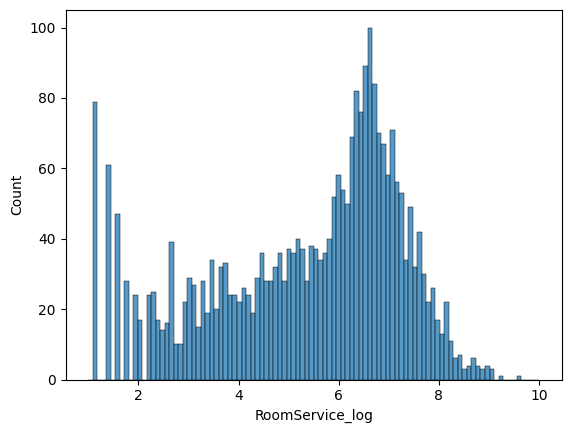

In [9]:
# histogram of log(RoomService) 
sns.histplot(
    train_df,
    x='RoomService_log',
    bins=100,
    binrange=(1, 10)
)

In [10]:
# bin room service expenses
room_service_bins = [-0.1, 0, 2, 4, 6, 8, np.inf]
room_service_labels = ['0', '0.001–2', '2–4', '4–6', '6–8', '8+']

# apply binning to df
train_df['RoomService_bin'] = pd.cut(train_df['RoomService_log'], bins=room_service_bins, labels=room_service_labels, right=True)
test_df['RoomService_bin'] = pd.cut(test_df['RoomService_log'], bins=room_service_bins, labels=room_service_labels, right=True)

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='FoodCourt_log', ylabel='Count'>

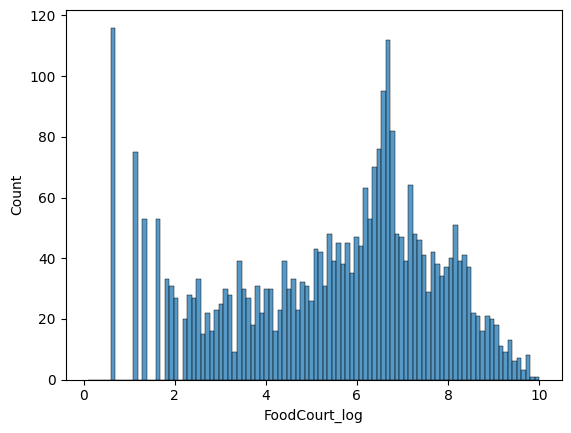

In [11]:
train_df['FoodCourt_log'] = np.log1p(train_df['FoodCourt'])
test_df['FoodCourt_log'] = np.log1p(test_df['FoodCourt'])

# histogram of log(FoodCourt)
sns.histplot(
    train_df,
    x='FoodCourt_log',
    bins=100,
    binrange= (0.1,10)
)

In [12]:
# bin food court expenses
food_court_bins = [-0.1, 0, 2, 4, 6, 8, np.inf]
food_court_labels = ['0', '0–2', '2–4', '4–6', '6–8', '8+']

# apply binning to df
train_df['FoodCourt_bin'] = pd.cut(train_df['FoodCourt_log'], bins=food_court_bins, labels=food_court_labels, right=True)
test_df['FoodCourt_bin'] = pd.cut(test_df['FoodCourt_log'], bins=food_court_bins, labels=food_court_labels, right=True)

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='ShoppingMall_log', ylabel='Count'>

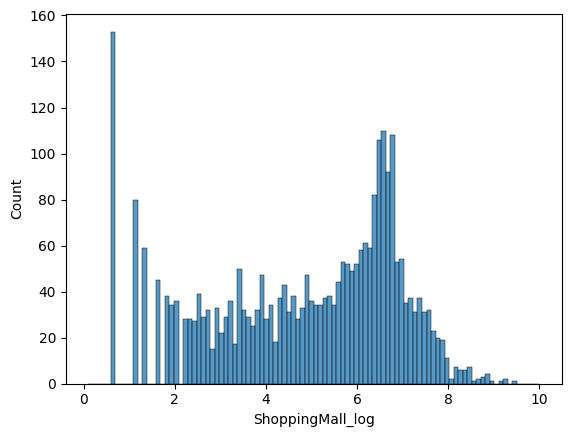

In [13]:
train_df['ShoppingMall_log'] = np.log1p(train_df['ShoppingMall'])
test_df['ShoppingMall_log'] = np.log1p(test_df['ShoppingMall'])

# histogram of log(ShoppingMall)
sns.histplot(
    train_df,
    x='ShoppingMall_log',
    bins=100,
    binrange= (0.1,10)
)

In [14]:
# bin shopping mall expenses
shop_mall_bins = [-0.1, 0, 2, 4, 6, 8, np.inf]
shop_mall_labels = ['0', '0–2', '2–4', '4–6', '6–8', '8+']

# apply binning to df
train_df['ShoppingMall_bin'] = pd.cut(train_df['ShoppingMall_log'], bins=shop_mall_bins, labels=shop_mall_labels, right=True)
test_df['ShoppingMall_bin'] = pd.cut(test_df['ShoppingMall_log'], bins=shop_mall_bins, labels=shop_mall_labels, right=True)

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Spa_log', ylabel='Count'>

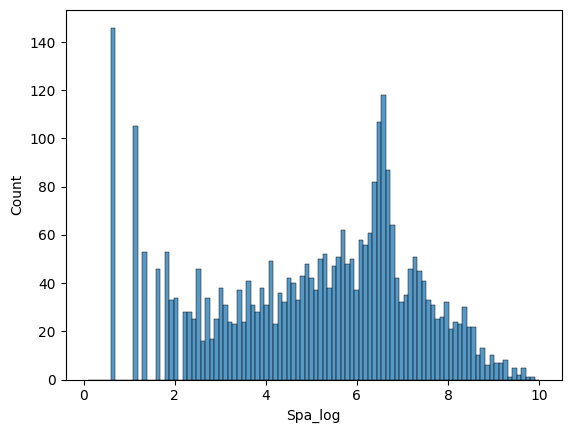

In [15]:
train_df['Spa_log'] = np.log1p(train_df['Spa'])
test_df['Spa_log'] = np.log1p(test_df['Spa'])

# histogram of log(Spa)
sns.histplot(
    train_df,
    x='Spa_log',
    bins=100,
    binrange= (0.1,10)
)

In [16]:
# bin shopping spa expenses
spa_bins = [-0.1, 0, 2, 4, 6, 8, np.inf]
spa_labels = ['0', '0–2', '2–4', '4–6', '6–8', '8+']

# apply binning to df
train_df['Spa_bin'] = pd.cut(train_df['Spa_log'], bins=spa_bins, labels=spa_labels, right=True)
test_df['Spa_bin'] = pd.cut(test_df['Spa_log'], bins=spa_bins, labels=spa_labels, right=True)

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='VRDeck_log', ylabel='Count'>

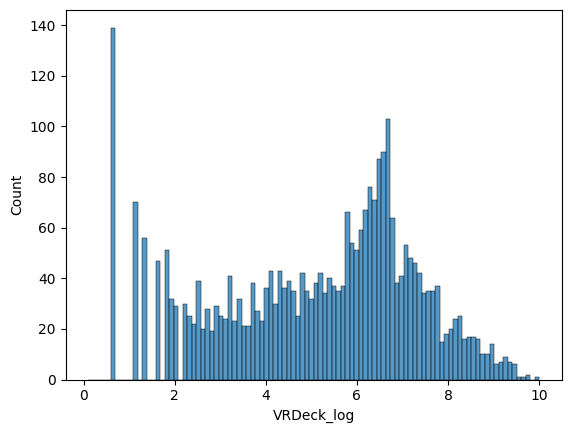

In [17]:
train_df['VRDeck_log'] = np.log1p(train_df['VRDeck'])
test_df['VRDeck_log'] = np.log1p(test_df['VRDeck'])

# histogram of log(VRDeck)
sns.histplot(
    train_df,
    x='VRDeck_log',
    bins=100,
    binrange= (0.1,10)
)

In [18]:
# bin VRDeck expenses
VR_bins = [-0.1, 0, 2, 4, 6, 8, np.inf]
VR_labels = ['0', '0–2', '2–4', '4–6', '6–8', '8+']

# apply binning to df
train_df['VRDeck_bin'] = pd.cut(train_df['VRDeck_log'], bins=VR_bins, labels=VR_labels, right=True)
test_df['VRDeck_bin'] = pd.cut(test_df['VRDeck_log'], bins=VR_bins, labels=VR_labels, right=True)

In [19]:
train_df.head(3)

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,...,RoomService_log,RoomService_bin,FoodCourt_log,FoodCourt_bin,ShoppingMall_log,ShoppingMall_bin,Spa_log,Spa_bin,VRDeck_log,VRDeck_bin
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,...,0.00000,0,0.000000,0,0.000000,0,0.000000,0,0.000000,0
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,...,4.70048,4–6,2.302585,2–4,3.258097,2–4,6.309918,6–8,3.806662,2–4
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,...,3.78419,2–4,8.182280,8+,0.000000,0,8.812248,8+,3.912023,2–4


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Age', ylabel='Count'>

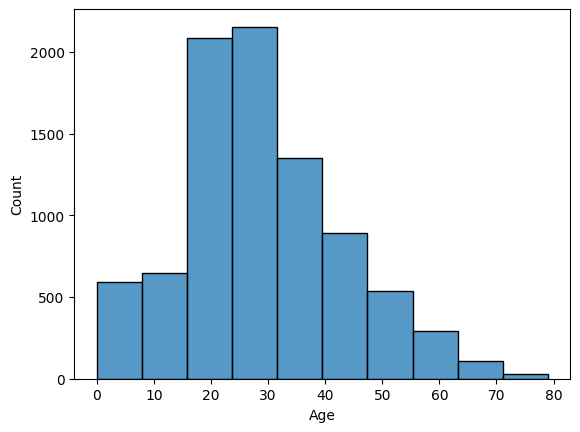

In [20]:
# histogram of ages
sns.histplot(
    train_df,
    x='Age',
    bins=10,
)

In [21]:
# divide age into 10 bins
train_df['Age_bin'] = pd.qcut(train_df['Age'], q=10)
test_df['Age_bin'] = pd.qcut(test_df['Age'], q=10)

In [22]:
train_df = train_df[['PassengerId', 'HomePlanet', 'CryoSleep', 'Destination', 'Age_bin', 'VIP', 'RoomService_bin',
       'FoodCourt_bin', 'ShoppingMall_bin', 'Spa_bin', 'VRDeck_bin', 'Transported',
       'Cabin_deck', 'Cabin_side']]
test_df = test_df[['PassengerId', 'HomePlanet', 'CryoSleep', 'Destination', 'Age_bin', 'VIP', 'RoomService_bin',
       'FoodCourt_bin', 'ShoppingMall_bin', 'Spa_bin', 'VRDeck_bin',
       'Cabin_deck', 'Cabin_side']]

In [23]:
train_df.head(3)

,PassengerId,HomePlanet,CryoSleep,Destination,Age_bin,VIP,RoomService_bin,FoodCourt_bin,ShoppingMall_bin,Spa_bin,VRDeck_bin,Transported,Cabin_deck,Cabin_side
0,0001_01,Europa,False,TRAPPIST-1e,"(35.0, 40.0]",False,0,0,0,0,0,False,B,P
1,0002_01,Earth,False,TRAPPIST-1e,"(21.0, 24.0]",False,4–6,2–4,2–4,6–8,2–4,True,F,S
2,0003_01,Europa,False,TRAPPIST-1e,"(49.0, 79.0]",True,2–4,8+,0,8+,2–4,False,A,S


## Model Building

In [24]:
X = train_df[['HomePlanet', 'CryoSleep', 'Destination', 'Age_bin', 'VIP', 'RoomService_bin',
       'FoodCourt_bin', 'ShoppingMall_bin', 'Spa_bin', 'VRDeck_bin',
       'Cabin_deck', 'Cabin_side']]
y = train_df['Transported']

In [25]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from xgboost import XGBClassifier

In [26]:
# catagorical columns
cat_cols= X.select_dtypes(include= ['object', 'category']).columns

# preprocessing pipeline
preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown= 'ignore'), cat_cols)
], remainder= 'passthrough')

# split data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [27]:
# create pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['HomePlanet', 'Destination', 'Age_bin', 'RoomService_bin',
       'FoodCourt_bin', 'ShoppingMall_bin', 'Spa_bin', 'VRDeck_bin',
       'Cabin_deck', 'Cabin_side'],
      dtype='object'))])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [28]:
# calculate accuracy
y_pred = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.7752


In [29]:
# create pipeline
XG_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))
])

XG_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['HomePlanet', 'Destination', 'Age_bin', 'RoomService_bin',
       'FoodCourt_bin', 'ShoppingMall_bin', 'Spa_bin', 'VRDeck_bin',
       'Cabin_deck', 'Cabin_side'],
      dtype='object'))])),
                ('classifier',
                 XGBClassifier(base_score=None, boost...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=42, ...))])

In [30]:
XG_submission_preds = XG_pipeline.predict(test_df)

submission = pd.DataFrame({
    'PassengerId': test_df['PassengerId'],
    'Transported': XG_submission_preds.astype(bool)
})

submission.to_csv('submission.csv', index=False)